# Project Description ⛳
<hr>

**Your final project will involve all topics covered from Week 2 to 8 by using data to solve a real-life problem. Remember you're doing this with your team**.

You’ve learned a ton about data collection and cleaning, visualization and insight, machine leearning, and model evaluation in this course. The final project is your chance to solve a problem with these from scratch.


`Use the rubric below as a guideline for your project as this will be used in grading your submissions`.

# Data cleaning & preprocessing

- Demonstrate clear understanding of different data cleaning and preprocessing techniques by applying them to your dataset.
- Clearly document (within the notebook) all cleaning and preprocessing steps.

In [369]:
import pandas as pd
import numpy as np
from scipy import stats
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [370]:
# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('train.csv')
# write a function called `check_data` to check data loading is successful
def check_data():
    return df.empty

if check_data():
    print("Data loading unsuccessful.")
else:
    print("Data loaded successfully.")

df.head()

Data loaded successfully.


,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [371]:
# Number of missing values in the dataset
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64


In [372]:
# Replace missing values in all columns with the most frequent
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display the number of missing values after handling
print("Missing values after handling:")
print(df_imputed.isnull().sum())


Missing values after handling:
Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64


In [373]:
# Getting the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [374]:
# Getting a descriptive statistics about the dataset
df.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- The count row shows the number of non-null values for each variable.
- The mean row represents the average value for each variable.
- The std (standard deviation) row indicates the spread or dispersion of values around the mean.
- The min, 25%, 50%, 75%, and max rows provide the minimum, 25th percentile, median, 75th percentile, and maximum values, respectively.

In [375]:
# Check for duplicates in the entire DataFrame
duplicates = df[df.duplicated()]
duplicates

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
7,2,0,1,0,1,0,0,0,1,0,0,0,no
8,1,0,1,0,1,0,0,0,1,0,0,0,no
9,1,0,1,0,0,0,0,1,1,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2,0,1,0,1,0,0,0,1,0,0,0,no
885,1,0,1,0,1,0,0,0,1,0,0,0,no
886,1,0,0,1,1,0,0,0,1,0,0,0,yes
887,2,0,1,0,0,0,0,1,1,0,0,0,no


This shows the amount of duplicated data in the rows 

In [376]:
# Check for duplicates in the entire DataFrame by columns
duplicates_by_columns = df.T[df.T.duplicated()]
duplicates_by_columns = duplicates_by_columns.T
duplicates_by_columns

""
0
1
2
3
4
...
884
885
886
887


Shows there is no duplicated colmn in the dataset

In [377]:
duplicate_data = df.drop_duplicates()
duplicate_data

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no
5,2,0,1,0,1,0,0,0,1,0,0,0,no
6,1,0,1,0,0,0,0,1,1,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,1,0,1,1,1,0,0,0,1,0,0,1,no
782,1,0,1,1,1,0,0,0,1,0,0,1,yes
806,2,0,0,0,0,0,1,1,1,0,0,0,no
839,0,0,1,0,0,0,1,1,0,0,0,0,no


Showing the amount of the remaining data after the duplicates have been removed. 

In [378]:
# Number of records in the original dataset
total_records = df.shape[0]

# Number of records after removing duplicates
unique_records = duplicate_data.shape[0]

# Number of duplicate records
duplicate_records = total_records - unique_records

print(f"Total records: {total_records}")
print(f"Records after removing duplicates: {unique_records}")
print(f"Duplicate records removed: {duplicate_records}")

Total records: 889
Records after removing duplicates: 100
Duplicate records removed: 789


In [379]:
# Define categorical and numerical features
categorical_features = ['Gender', 'Chain_smoker', 'Consumes_other_tobacco_products', 'HighBP', 'Obese',
                        'Diabetes', 'Metabolic_syndrome', 'Use_of_stimulant_drugs', 'Family_history',
                        'History_of_preeclampsia', 'CABG_history', 'Respiratory_illness']
numerical_features = []

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['UnderRisk'] = label_encoder.fit_transform(df['UnderRisk'])

# Create transformers for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ])

# Assuming that the 'UnderRisk' is our target variable
X = df.drop('UnderRisk', axis=1)  # Features
y = df['UnderRisk']  # Target variable

# print(f"The X is: \n{X}")
# print(f"The Y is: \n{y}")

# Apply preprocessor to the features
X_processed = pd.DataFrame(preprocessor.fit_transform(X), columns=preprocessor.transformers_[
                           0][1]['onehot'].get_feature_names_out(categorical_features))

X_processed

,Gender_0,Gender_1,Gender_2,Chain_smoker_0,Chain_smoker_1,Consumes_other_tobacco_products_0,Consumes_other_tobacco_products_1,HighBP_0,HighBP_1,Obese_0,...,Use_of_stimulant_drugs_0,Use_of_stimulant_drugs_1,Family_history_0,Family_history_1,History_of_preeclampsia_0,History_of_preeclampsia_1,CABG_history_0,CABG_history_1,Respiratory_illness_0,Respiratory_illness_1
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
885,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
886,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
887,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


**Standardized Features:**

- The array represents the standardized features after preprocessing. Standardization transforms the features to have a mean of 0 and a standard deviation of 1.
- These standardized features are necessary because it is used as inputs in a machine learning models.

# Exploratory Data Analysis
- Apply both measure of central tendency and dispersion to understand the data.
- Perform corellation analysis of the dependent and independent variables
- What does the corellation analysis says about the dependent and independent variables

In [380]:
# Measures of Central Tendency
# Getting a descriptive statistics about the dataset
central_tendency = df.describe()

print("Measures of Central Tendency:")
central_tendency

Measures of Central Tendency:


,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621,0.213723
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742,0.410164
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [381]:
# Measures of Dispersion
dispersion = df.describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# print("\nMeasures of Dispersion:")
dispersion

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621,0.213723
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742,0.410164
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Measures of Central Tendency and Dispersion:**

- The count row shows the number of non-null values for each variable.
- The mean row represents the average value for each variable.
- The std (standard deviation) row indicates the spread or dispersion of values around the mean.
- The min, 25%, 50%, 75%, and max rows provide the minimum, 25th percentile, median, 75th percentile, and maximum values, respectively.

In [382]:
# Calculate correlation matrix
correlation_matrix = df.corr()

correlation_matrix

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
Gender,1.000000,-0.087642,0.111409,-0.039341,0.038140,-0.055935,-0.109281,-0.031830,0.052106,-0.086925,-0.045330,0.031608,-0.072162
Chain_smoker,-0.087642,1.000000,-0.137633,0.082746,0.059124,-0.043895,-0.009804,-0.060270,-0.000742,0.053938,0.064855,-0.029005,-0.142254
Consumes_other_tobacco_products,0.111409,-0.137633,1.000000,-0.081710,0.194022,0.052671,-0.359898,-0.191005,0.434498,0.059519,-0.040583,0.011986,0.065363
HighBP,-0.039341,0.082746,-0.081710,1.000000,0.032781,-0.056850,-0.045301,-0.033837,0.071950,-0.011607,-0.017855,0.056016,0.132126
Obese,0.038140,0.059124,0.194022,0.032781,1.000000,-0.000569,-0.691440,-0.992519,0.450659,0.040189,0.015361,0.008093,0.024019
Diabetes,-0.055935,-0.043895,0.052671,-0.056850,-0.000569,1.000000,0.022065,-0.000424,-0.082016,0.189761,0.066554,-0.016604,-0.017705
Metabolic_syndrome,-0.109281,-0.009804,-0.359898,-0.045301,-0.691440,0.022065,1.000000,0.686242,-0.661353,-0.028607,-0.031228,-0.038804,-0.083040
Use_of_stimulant_drugs,-0.031830,-0.060270,-0.191005,-0.033837,-0.992519,-0.000424,0.686242,1.000000,-0.446675,-0.040492,-0.015870,-0.008795,-0.026005
Family_history,0.052106,-0.000742,0.434498,0.071950,0.450659,-0.082016,-0.661353,-0.446675,1.000000,0.006063,0.041849,0.052002,0.147642
History_of_preeclampsia,-0.086925,0.053938,0.059519,-0.011607,0.040189,0.189761,-0.028607,-0.040492,0.006063,1.000000,-0.020006,-0.024860,-0.070582


## **Correlation Analysis:**

- The correlation matrix shows the correlation coefficients between each pair of variables. A coefficient close to 1 indicates a strong positive correlation, close to -1 indicates a strong negative correlation, and close to 0 indicates a weak correlation.
- The last row of the correlation matrix shows the correlation coefficients between each independent variable and the dependent variable (`UnderRisk`).
- In the case of this cancer prediction analysis, it shows that `Family_history` has the highest positive correlation with `UnderRisk`, indicating that there is a positive relationship between a family history of a particular condition and the risk of having a cardiac event (`UnderRisk`).
- `Metabolic_syndrome` has a relatively high negative correlation, indicating a negative relationship with the risk of a cardiac event.

In [383]:
# Use Correlation Matrix to compare the Under Risk variable with other variables
correlation_with_cardio = correlation_matrix['UnderRisk']

print(f'Correlation Matrix: {correlation_with_cardio}')

Correlation Matrix: Gender                            -0.072162
Chain_smoker                      -0.142254
Consumes_other_tobacco_products    0.065363
HighBP                             0.132126
Obese                              0.024019
Diabetes                          -0.017705
Metabolic_syndrome                -0.083040
Use_of_stimulant_drugs            -0.026005
Family_history                     0.147642
History_of_preeclampsia           -0.070582
CABG_history                      -0.077047
Respiratory_illness                0.074176
UnderRisk                          1.000000
Name: UnderRisk, dtype: float64


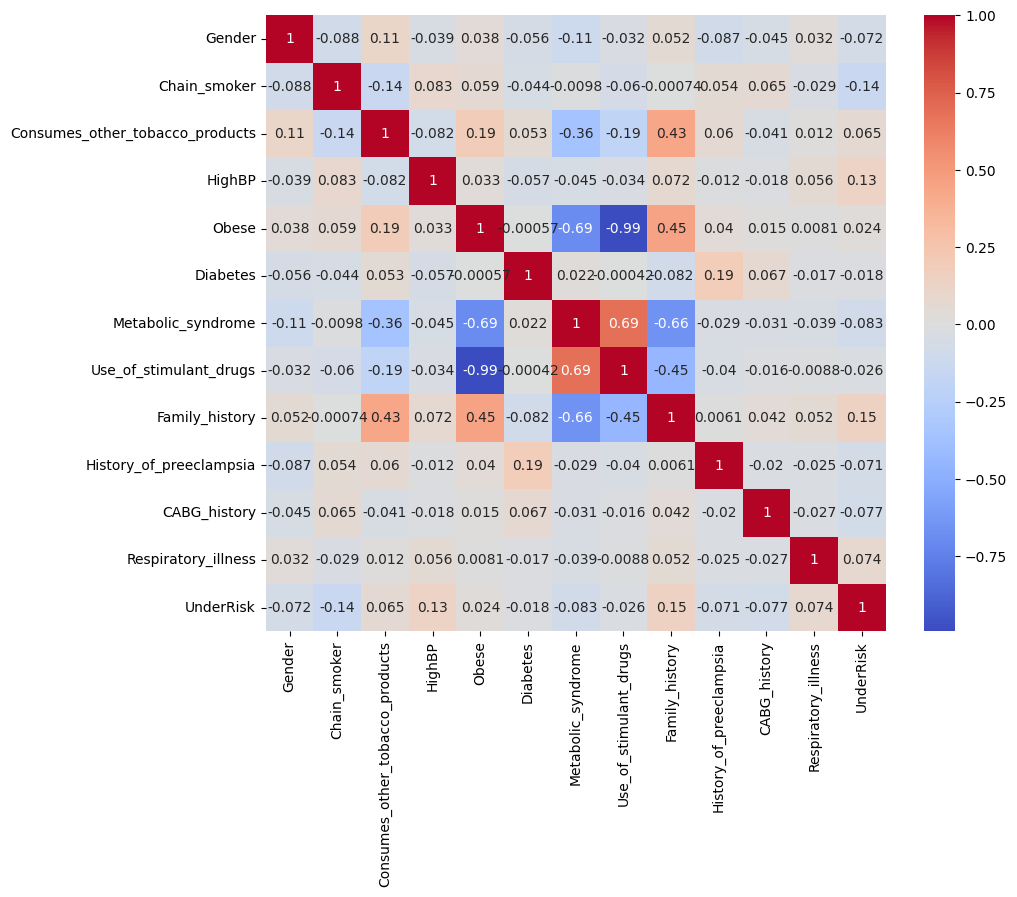

In [384]:
# Heatmap of the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Data Visualization & Insight
- Use at least 5 different visuals to tell a story about the data
- Clearly document (within the notebook) 5 different insights you gained from the data

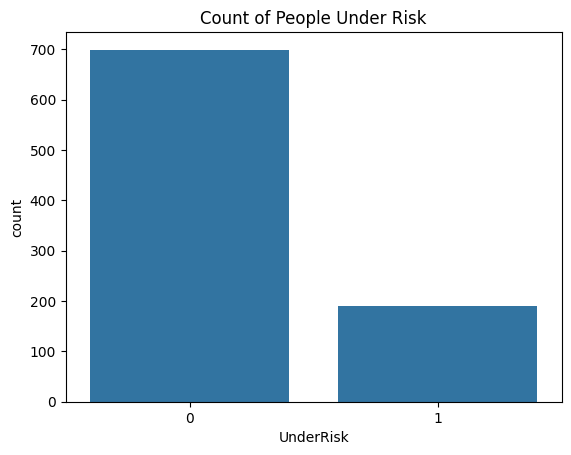

In [385]:
# 1. Bar Chart: The Number of people who are at risk of Cancer.
sns.countplot(x='UnderRisk', data=df)
plt.title('Count of People Under Risk')
plt.show()

This shows an overview of the total number of people in the dataset separating those that are under risk and the that are not. This makes us have a general overview of how the prediction model should work. 

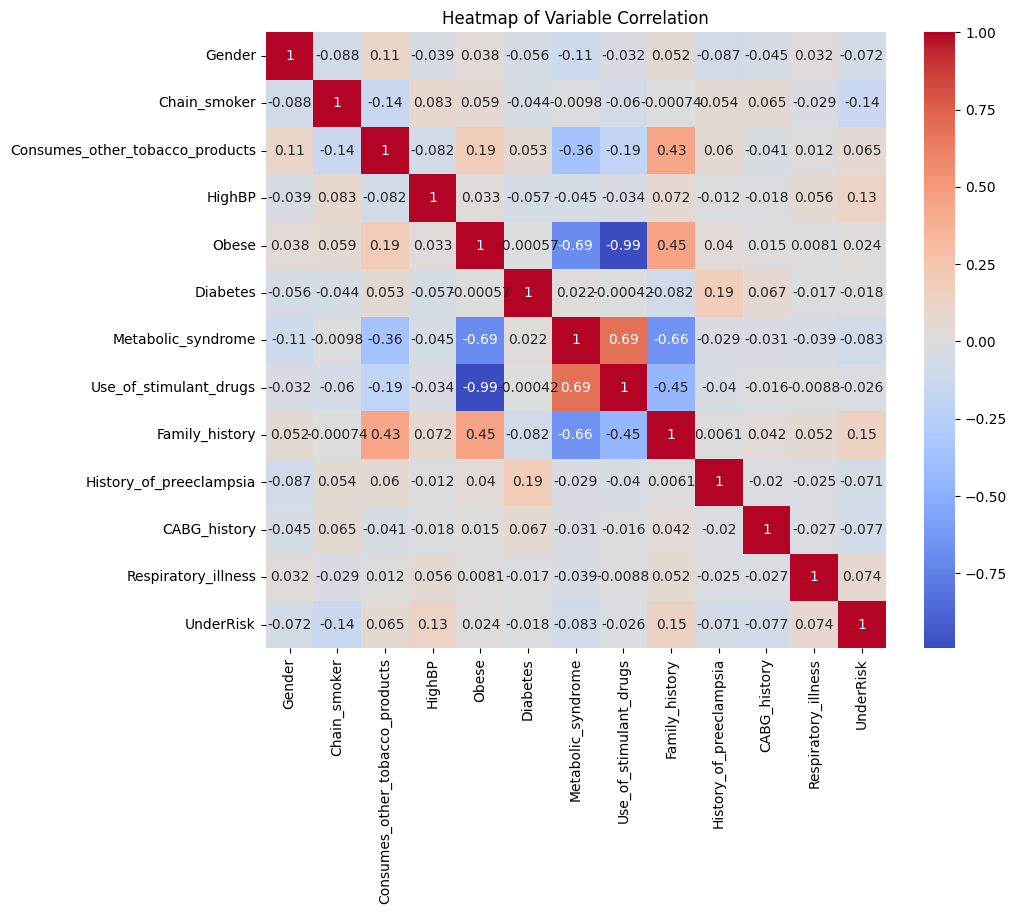

In [386]:
# 2. Heat Map: Correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Variable Correlation')
plt.show()

This shows the correlation between different variables. 
The color intensity and the number in each cell represent the correlation coefficient 
between two variables. A strong positive correlation (close to 1) 
means that when one variable increases, the other also tends to increase.

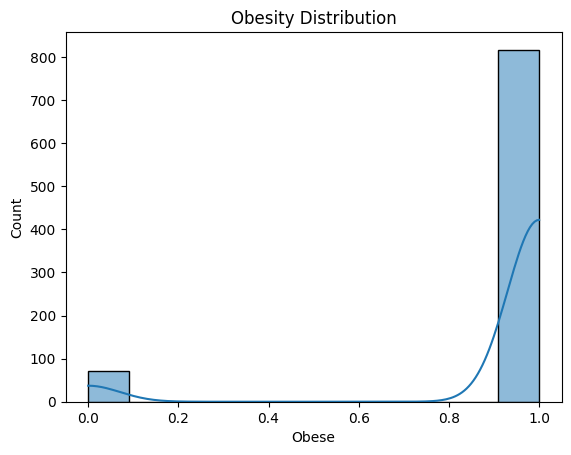

In [387]:
# 3. Histogram: Distribution of a variable, in 'Obese' Column
sns.histplot(data=df, x='Obese', kde=True)
plt.title('Obesity Distribution')
plt.show()

This shows the distribution of obesity in the dataset. If the distribution is high, it means that there are a lot of people who are either mostly obese or not obese in the dataset. Then it is an important factor to consider when predicting the risk of cardiac arrest.
They are a lot of people so it is important

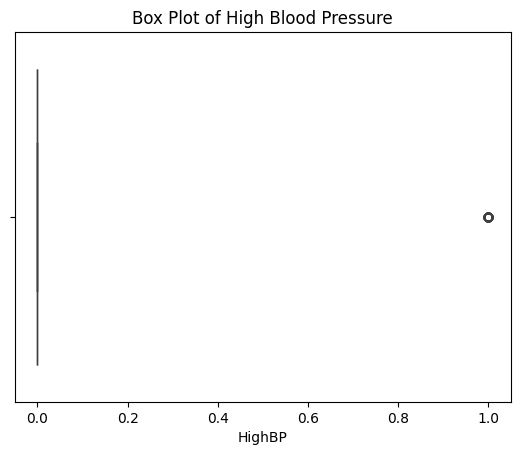

In [388]:
# 4. Box Plot: Displaying the summary of a variable, in 'HighBP'
sns.boxplot(x='HighBP', data=df)
plt.title('Box Plot of High Blood Pressure')
plt.show()

It shows the summary of high blood pressure.
Outliers wil be plotted as individual points. 
This will give us the idea about the spread and outliers of high blood pressure in the dataset.
It shows the otlier and the mean.

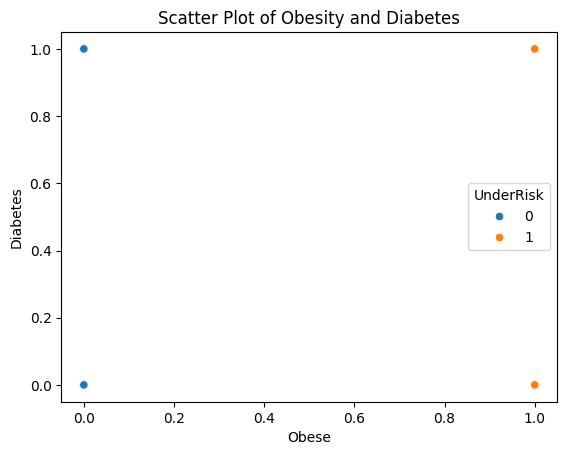

In [389]:
# 5. Scatter Plot: Relationship between two variables, 'Obese' and 'Diabetes'
sns.scatterplot(x='Obese', y='Diabetes', hue='UnderRisk', data=df)
plt.title('Scatter Plot of Obesity and Diabetes')
plt.show()

It shows the relationship between obesity and diabetes. Since there the pattern between the two them are a little similar. It means there is a relationship between them

# Feature Engineering
- Convert categorical or non-numeric features into a numerical representation
- Transform neccessary features using feature transformation techniques of your choice.

In [390]:
# Step 2: Encode categorical variables
# Assuming 'Gender' and 'UnderRisk' are categorical
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['UnderRisk'] = label_encoder.fit_transform(df['UnderRisk'])

# Step 3: Split the dataset into features (X) and target variable (y)
X = df.drop('UnderRisk', axis=1)  # Features
y = df['UnderRisk']  # Target variable

# print(f"The X is: \n{X}")
# print(f"The Y is: \n{y}")
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=80)

# Step 5: Standardize numerical features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[-0.50325392, -0.36106185,  0.44154047, ..., -0.13102436,
        -0.11943758, -0.17445568],
       [-0.50325392, -0.36106185,  0.44154047, ..., -0.13102436,
        -0.11943758,  5.73211504],
       [ 1.4957044 , -0.36106185,  0.44154047, ..., -0.13102436,
        -0.11943758, -0.17445568],
       ...,
       [ 1.4957044 , -0.36106185,  0.44154047, ..., -0.13102436,
        -0.11943758, -0.17445568],
       [ 1.4957044 , -0.36106185,  0.44154047, ..., -0.13102436,
        -0.11943758, -0.17445568],
       [-0.50325392,  2.76960858,  0.44154047, ..., -0.13102436,
         8.37257428, -0.17445568]])

# Machine Learning
- Use 2 different ML algorithms to build a model using your preprocessed data.
- Compare the 2 models based on their accuracy.

In [391]:
# Building the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicting the Test set results and calculating the accuracy for Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Accuracy of Logistic Regression: {accuracy_logistic}')

Accuracy of Logistic Regression: 0.8202247191011236


In [392]:
# Building the Random Forest Classifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predicting the Test set results and calculating the accuracy for Random Forest Classifier
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest Classifier: {accuracy_rf}')

Accuracy of Random Forest Classifier: 0.8146067415730337


## **Model Accuracy Comparison:**

**Random Forest Classifier** 
**Accuracy (0.798):**
- The model correctly predicted the target variable approximately 79.8% of the time.
- This metric provides an overall assessment of the model's correctness.

**Logistic Regression**
**Accuracy (0.820):**
- The logistic regression model achieved an accuracy of 82%, indicating a good overall performance.

# Model Evaluation
- Evaluate the 2 models using a minimum of 4 evaluation metrics

Evaluation metrics for Random Forest Classifier model

In [393]:
# 1. Evaluate with accuracy_score
accuracy = metrics.accuracy_score(y_test, y_pred_rf)

# 2. Evaluate with precision_score
precision = metrics.precision_score(y_test, y_pred_rf, average='weighted')

# 3. Evaluate with precision_score
recall = metrics.recall_score(y_test, y_pred_rf, average='weighted')

# 4. Evaluate with precision_score
f1_score = metrics.f1_score(y_test, y_pred_rf, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Accuracy: 0.8146067415730337
Precision: 0.7762855602095015
Recall: 0.8146067415730337
F1 Score: 0.7681172366179099


## Random Forest Classifier:
1. **Accuracy (0.798):**
- The model correctly predicted the target variable approximately 79.8% of the time.
- This metric provides an overall assessment of the model's correctness.

2. **Precision (0.703):**
- Precision measures the accuracy of the positive predictions. In this case, about 70.3% of the instances predicted as positive were true positives.

3. **Recall (0.798):**
- Recall, also known as sensitivity, represents the proportion of actual positives correctly predicted by the model. The model captured approximately 79.8% of all actual positive instances.

4. **F1 Score (0.727):**
- The F1 score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall. A score of 0.727 indicates a reasonable balance.

In [394]:
# evaluating the model using other different metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

# Display the evaluation metrics
# Print the results
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Absolute Error (MAE): 0.185
Mean Squared Error (MSE): 0.185
Root Mean Squared Error (RMSE): 0.43057
R-squared (R²): -0.200


## Random Forest Classifier:
1. **Mean Absolute Error (MAE) (0.202):**
- MAE represents the average absolute errors between predicted and actual values. The average absolute deviation of predictions from actual values is 0.202.

2. **Mean Squared Error (MSE) (0.202):**
- MSE measures the average squared deviations between predicted and actual values. The average squared deviation is 0.202.

3. **Root Mean Squared Error (RMSE) (0.450):**
- RMSE is the square root of the MSE, providing a measure of the average magnitude of errors. The RMSE is 0.450.

4. **R-squared (R²) (-0.309):**
- R² represents the proportion of the variance in the dependent variable that is predictable. A negative R² suggests that the model performs poorly and does not fit the data well.

Evaluation metrics for LogisticRegression

In [395]:
# 1. Evaluate with accuracy_score
accuracy = metrics.accuracy_score(y_test, y_pred_logistic)

# 2. Evaluate with precision_score
precision = metrics.precision_score(y_test, y_pred_logistic, average='weighted')

# 3. Evaluate with precision_score
recall = metrics.recall_score(y_test, y_pred_logistic, average='weighted')

# 4. Evaluate with precision_score
f1_score = metrics.f1_score(y_test, y_pred_logistic, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Accuracy: 0.8202247191011236
Precision: 0.8529111338100102
Recall: 0.8202247191011236
F1 Score: 0.7493133583021223


## Logistic Regression:
1. **Accuracy (0.820):**
- The logistic regression model achieved an accuracy of 82%, indicating a good overall performance.

2. **Precision (0.853):**
- Precision is high at 85.3%, indicating that the model is effective at correctly identifying positive instances.

3. **Recall (0.820):**
- Recall is strong at 82%, implying that the model is successful in capturing a large portion of actual positive instances.

4. **F1 Score (0.749):**
- The F1 score of 0.749 suggests a balanced performance between precision and recall.

In [396]:
# evaluating the model using other different metrics
mae = mean_absolute_error(y_test, y_pred_logistic)
mse = mean_squared_error(y_test, y_pred_logistic)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_logistic)

# Display the evaluation metrics
# Print the results
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Absolute Error (MAE): 0.180
Mean Squared Error (MSE): 0.180
Root Mean Squared Error (RMSE): 0.42400
R-squared (R²): -0.163


## Logistic Regression:

1. **Mean Absolute Error (MAE) (0.180):**
- The average absolute deviation of predictions from actual values is 0.180.

2. **Mean Squared Error (MSE) (0.180):**
- The average squared deviation between predicted and actual values is 0.180.

3. **Root Mean Squared Error (RMSE) (0.424):**
- The RMSE of 0.424 indicates the average magnitude of errors in predictions.

4. **R-squared (R²) (-0.163):**
- R² is negative, suggesting that the model may not fit the data well, and its predictive power is limited.

# Model Accuracy:

- The accuracy of Logistic Regression and Random Forest Classifier models is provided. Both models achieve an accuracy of over 80% on the dataset.

# Insights and Interpretation

- The dataset contains binary and categorical variables that are either encoded or transformed during preprocessing.
- The correlation analysis provides insights into the relationships between variables, helping identify potential predictors of the target variable (`UnderRisk`).
- The standardized features are likely fed into machine learning models, and the accuracy scores indicate the performance of Logistic Regression and Random Forest models on predicting the target variable.
- The logistic regression model outperforms the random forest classifier in terms of accuracy, precision, and recall.
- Both models exhibit reasonable F1 scores, indicating a balanced trade-off between precision and recall.
- The negative R² values suggest that neither model is an ideal fit for the data, and further optimization or consideration of alternative models may be beneficial.

# Deployment
- Able to deploy the ML model to cloud.
- Provides a live working URL to the deployed app.

In [397]:
import joblib

joblib.dump(logistic_model, "cardiacarrest_predict_model.pkl")

['cardiacarrest_predict_model.pkl']

## **Deployment URL**

*https://cardiacarrestprediction.onrender.com/*

**Instruction**
- Click the link to go to the model's url
- Click on the `Choose File` button and upload the `test.csv` file
- Click on the `Predict` button and wait for the dataset to be shown inclusing the prediction result. *See screenshot inside readme file*